🧑‍🔬 # What exactly is this model predicting?
The model takes in features like alcohol content, malic acid, flavanoids, color intensity, proline, etc., and predicts which class (WineType) each wine sample belongs to.

WineType is a categorical variable (class_0, class_1, class_2), representing different varieties or categories of wines.

In [ ]:
## Import the load_wine dataset from scikit-learn's built-in datasets
from sklearn.datasets import load_wine
# Import pandas for data manipulation
import pandas as pd

# Load the built-in wine dataset
# This is a classic machine learning dataset containing chemical analysis of wines 
# grown in the same region in Italy but derived from three different cultivars
wine = load_wine()

# Convert the numeric data from the dataset into a pandas DataFrame
# wine.data contains the feature measurements
# wine.feature_names provides the column names for these features
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add a new column "WineType" that converts the numeric target 
# to its corresponding string label using a list comprehension
# wine.target contains numeric labels (0, 1, 2)
# wine.target_names contains the corresponding string labels 
# (e.g., ['class_0', 'class_1', 'class_2'])
wine_df["WineType"] = [wine.target_names[typ] for typ in wine.target]

# Display the first few rows of the DataFrame to verify the data
wine_df.head()

In machine learning, each column (e.g., alcohol, malic_acid, flavanoids) is called a feature, and each row represents a sample (e.g., individual wine instances). When splitting data into training and test sets, the split is performed row-wise (sample-wise), preserving columns to ensure consistent feature representation across both sets.

In [2]:
# Import the train_test_split function from scikit-learn's model selection module
from sklearn.model_selection import train_test_split

# Perform train-test split on the wine dataset
# Parameters:
# - wine.data: The feature matrix (input variables)
# - wine.target: The target variable (what we want to predict)
# - train_size=0.8: 80% of the data will be used for training
# - random_state=123: Sets a fixed random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(
    wine.data,       # Features
    wine.target,     # Target variable
    train_size=0.8,  # 80% of data for training, 20% for testing
    random_state=123 # Ensures reproducible split
)

# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((142, 13), (36, 13), (142,), (36,))

```
((142, 13), (36, 13), (142,), (36,))
```

1. `(142, 13)` - X_train shape:
   - 142 samples (rows)
   - 13 features (columns)
   - This means your training dataset contains 142 wine samples, each with 13 different chemical measurements

2. `(36, 13)` - X_test shape:
   - 36 samples (rows)
   - 13 features (columns)
   - Your testing dataset has 36 wine samples, also with 13 chemical measurements

3. `(142,)` - Y_train shape:
   - 142 labels corresponding to the 142 training samples
   - These are the wine type/class labels for the training data

4. `(36,)` - Y_test shape:
   - 36 labels corresponding to the 36 testing samples
   - These are the wine type/class labels for the testing data

Total dataset information:
- Total samples: 142 + 36 = 178 (standard size of the wine dataset)
- Features per sample: 13
- Split ratio: ~80% training (142 samples), ~20% testing (36 samples)

This split ensures you have a good amount of data to train your model and a separate set to evaluate its performance.

### Why normalization matters?

It's important to scale your data in machine learning to help algorithms converge faster and improve model accuracy, especially when features have vastly different scales or units. One common way to do this is with StandardScaler from scikit-learn, which standardizes data by removing the mean and scaling to unit variance. Make sure to fit the scaler ONLY on the training data and never fit it on your test data. For example, if your training data for a feature called "Gene Expression Level" has a mean of 100 and a standard deviation of 20, you'll apply these exact parameters (mean=100, sd=20) to scale your test data—even if the test data's mean and standard deviation differ. This ensures no data leakage occurs. Therefore, always use the training scaler parameters to transform your test data.

Imagine you're comparing athletes:
    One's height is measured in centimeters (170-200)
Another's weight is in kilograms (60-100)
Third's running speed is in meters/second (2-5)
    If you tried to compare them directly, the weight would seem to "matter most" because its numbers are larger. Normalization is like putting everyone in the same uniform - it lets you compare fairly.
    In machine learning:
Large-scale features can "bully" smaller features
Algorithms get confused by different scales
Normalization puts all features on equal footing



In [ ]:
## from sklearn.preprocessing import StandardScaler
import numpy as np

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
# This calculates the mean and standard deviation
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the SAME scaler
# Uses mean and std dev from training data
X_test_scaled = scaler.transform(X_test)

In [7]:
# After train_test_split, you'll typically apply machine learning models
# Let's use a few different classifiers to compare their performance

# Import necessary classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=123)
rf_classifier.fit(X_train, Y_train)
rf_predictions = rf_classifier.predict(X_test)

print("Random Forest Classifier Results:")
print(classification_report(Y_test, rf_predictions, target_names=wine.target_names))

Random Forest Classifier Results:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         8
     class_1       1.00      1.00      1.00        11
     class_2       1.00      1.00      1.00        17

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



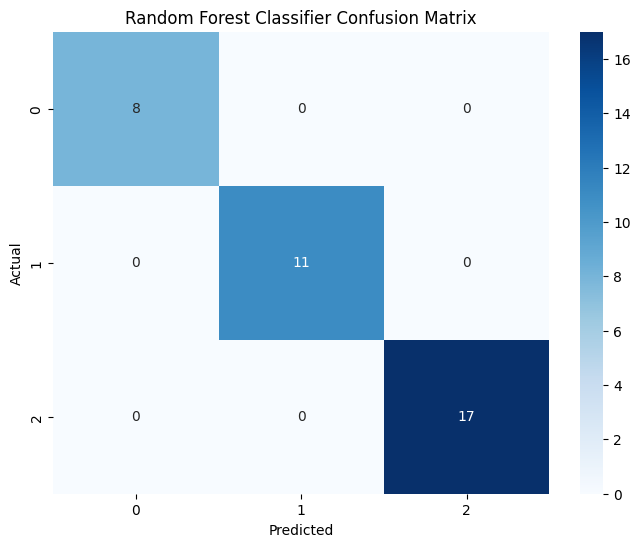

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(Y_test, rf_predictions, labels=rf_classifier.classes_)

# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

Figure Legend:
Confusion matrix showing perfect classification performance (100% accuracy) of a Random Forest model on a 3-class dataset. All 39 test instances were correctly predicted:
Classes 0 and 1: 11 correct predictions each
Class 2: 17 correct predictions
No misclassifications observed.

In [32]:
from lime import lime_tabular

# Set feature and class names
feature_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
                 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
                 'proanthocyanins', 'color_intensity', 'hue',
                 'od280/od315_of_diluted_wines', 'proline']
class_names = ['class_0', 'class_1', 'class_2']

# Create Lime explainer (use training data)
explainer = lime_tabular.LimeTabularExplainer(X_train,
                                              feature_names=feature_names,
                                              class_names=class_names,
                                              mode="classification")


In [33]:
# Create explanation for instance 0
explanation = explainer.explain_instance(X_test[0], 
                                         rf_classifier.predict_proba,
                                         num_features=len(feature_names),
                                         top_labels=3)



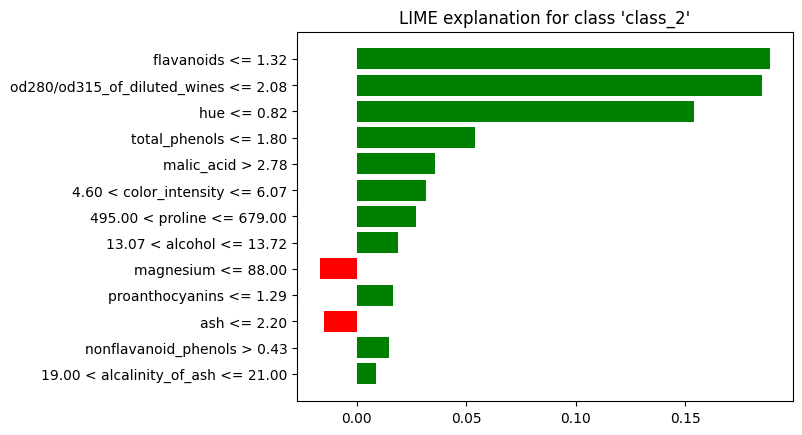

In [35]:
import matplotlib.pyplot as plt

fig = explanation.as_pyplot_figure(label=explanation.top_labels[0])
plt.title(f"LIME explanation for class '{class_names[explanation.top_labels[0]]}'")
plt.show()

Predicted class: class_2


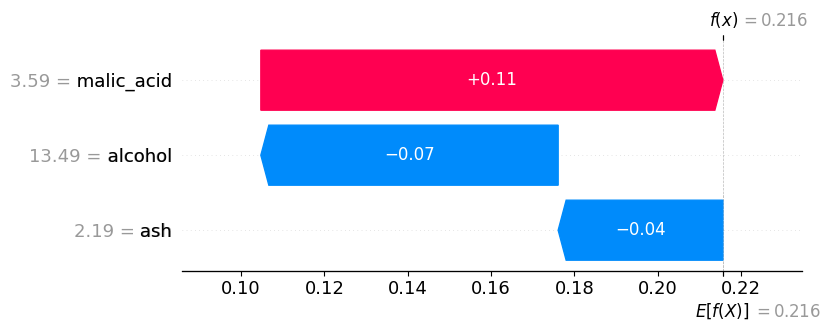

In [42]:
# SHAP explainer (TreeExplainer is optimal for tree-based models)
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test)

# SHAP waterfall plot for the first instance's predicted class
pred_class = rf_classifier.predict(X_test)[0]
print(f"Predicted class: {wine.target_names[pred_class]}")

shap.plots.waterfall(shap.Explanation(values=shap_values[pred_class][0],
                                      base_values=explainer.expected_value[pred_class],
                                      data=X_test[0],
                                      feature_names=wine.feature_names))

In [8]:
# 2. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)
log_predictions = log_reg.predict(X_test)

print("\nLogistic Regression Results:")
print(classification_report(Y_test, log_predictions, target_names=wine.target_names))


Logistic Regression Results:
              precision    recall  f1-score   support

     class_0       0.89      1.00      0.94         8
     class_1       0.91      0.91      0.91        11
     class_2       1.00      0.94      0.97        17

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


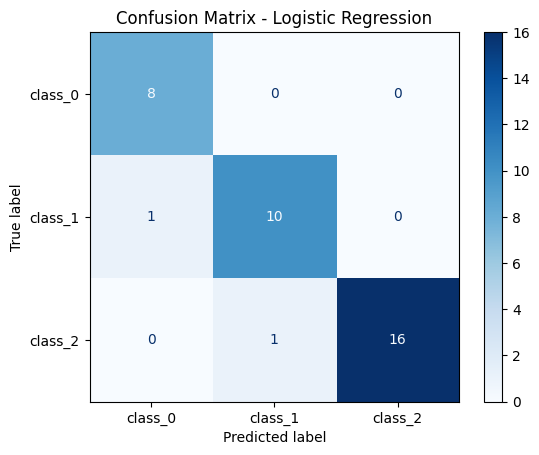

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(Y_test, log_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)

# Plot it
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [72]:
# 3. Support Vector Machine
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, Y_train)
svm_predictions = svm_classifier.predict(X_test)

print("\nSupport Vector Machine Results:")
print(classification_report(Y_test, svm_predictions, target_names=wine.target_names))



Support Vector Machine Results:
              precision    recall  f1-score   support

     class_0       0.80      1.00      0.89         8
     class_1       0.38      0.91      0.54        11
     class_2       0.00      0.00      0.00        17

    accuracy                           0.50        36
   macro avg       0.39      0.64      0.48        36
weighted avg       0.30      0.50      0.36        36



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


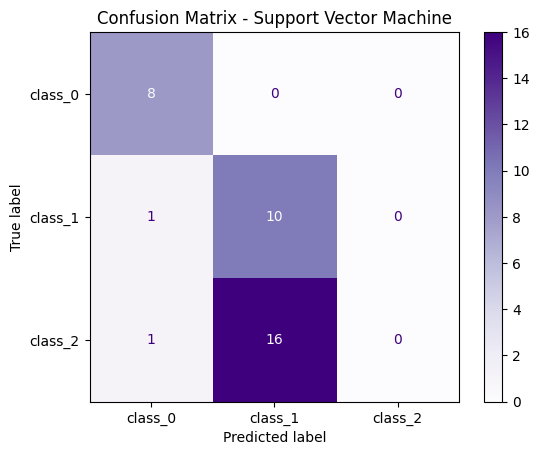

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm_svm = confusion_matrix(Y_test, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=wine.target_names)

# Plot
disp_svm.plot(cmap='Purples')
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation Report for {model_name}")
    print(classification_report(y_true, y_pred, target_names=wine.target_names))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")


In [79]:
evaluate_model(Y_test, log_predictions, "Logistic Regression")
evaluate_model(Y_test, svm_predictions, "SVM")
evaluate_model(Y_test, rf_predictions, "Random Forest")



Evaluation Report for Logistic Regression
              precision    recall  f1-score   support

     class_0       0.89      1.00      0.94         8
     class_1       0.91      0.91      0.91        11
     class_2       1.00      0.94      0.97        17

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Accuracy: 0.944

Evaluation Report for SVM
              precision    recall  f1-score   support

     class_0       0.80      1.00      0.89         8
     class_1       0.38      0.91      0.54        11
     class_2       0.00      0.00      0.00        17

    accuracy                           0.50        36
   macro avg       0.39      0.64      0.48        36
weighted avg       0.30      0.50      0.36        36

Accuracy: 0.500

Evaluation Report for Random Forest
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00 

/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


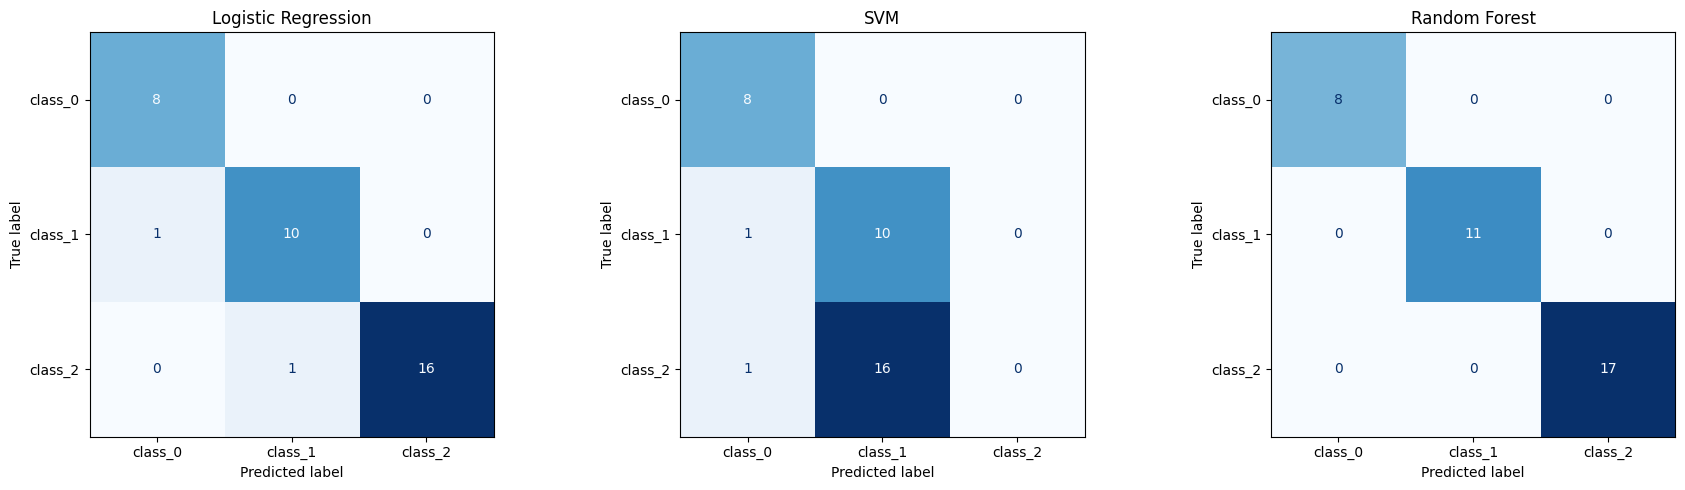

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = {
    "Logistic Regression": log_predictions,
    "SVM": svm_predictions,
    "Random Forest": rf_predictions
}

for ax, (title, preds) in zip(axes, models.items()):
    cm = confusion_matrix(Y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [82]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Random Forest"],
    "Accuracy": [
        accuracy_score(Y_test, log_predictions),
        accuracy_score(Y_test, svm_predictions),
        accuracy_score(Y_test, rf_predictions)
    ],
    "F1 Score (macro)": [
        f1_score(Y_test, log_predictions, average='macro'),
        f1_score(Y_test, svm_predictions, average='macro'),
        f1_score(Y_test, rf_predictions, average='macro')
    ]
})

print(results)


                 Model  Accuracy  F1 Score (macro)
0  Logistic Regression  0.944444          0.939988
1                  SVM  0.500000          0.476476
2        Random Forest  1.000000          1.000000


In [83]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_and_plot_classifiers(models, X_test, Y_test, model_names, class_labels):
    """
    Evaluate multiple classifiers and visualize performance metrics.

    Args:
        models (list): Trained classifiers
        X_test (array-like): Test features
        Y_test (array-like): True labels
        model_names (list): Names of the models (must match length of models)
        class_labels (list): Class label names (e.g., ['class 0', 'class 1', 'class 2'])
    """
    Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
    n_classes = Y_test_bin.shape[1]

    summary = []

    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        y_prob = None
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
            if y_prob.ndim == 1:
                y_prob = np.expand_dims(y_prob, axis=1)

        metrics = {
            "Model": name,
            "Accuracy": accuracy_score(Y_test, y_pred),
            "Precision": precision_score(Y_test, y_pred, average="macro"),
            "Recall": recall_score(Y_test, y_pred, average="macro"),
            "F1 Score": f1_score(Y_test, y_pred, average="macro"),
        }

        if y_prob is not None:
            metrics["ROC AUC"] = roc_auc_score(Y_test_bin, y_prob, multi_class='ovr')
        else:
            metrics["ROC AUC"] = np.nan  # SVM with no probability output

        summary.append(metrics)

    # Convert to DataFrame
    df_summary = pd.DataFrame(summary)

    # Plot
    df_melted = df_summary.melt(id_vars="Model", var_name="Metric", value_name="Score")

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model")
    plt.ylim(0, 1.05)
    plt.title("Model Performance Comparison")
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return df_summary


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


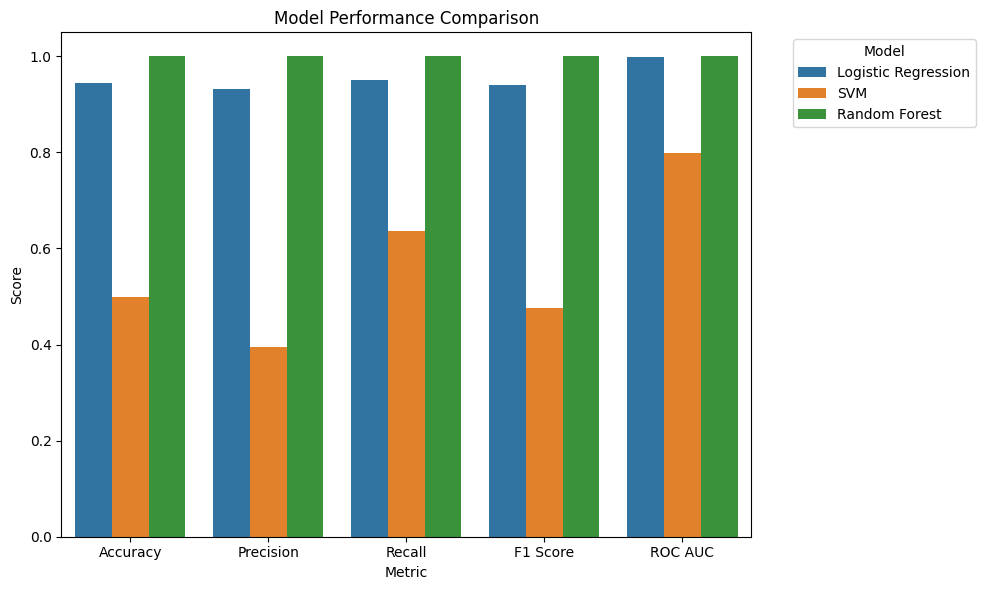

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.944444   0.932660  0.950089  0.939988  0.998788
1                  SVM  0.500000   0.394872  0.636364  0.476476  0.798814
2        Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000


In [84]:
# Example usage
models = [log_reg, svm_classifier, rf_classifier]
model_names = ["Logistic Regression", "SVM", "Random Forest"]

metrics_df = evaluate_and_plot_classifiers(models, X_test, Y_test, model_names, wine.target_names)
print(metrics_df)


In [85]:
def evaluate_model_metrics(model, X_test, Y_test, model_name, class_labels):
    """
    Plot accuracy, precision, recall, F1, ROC AUC for a single model.
    """
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    from sklearn.preprocessing import label_binarize

    Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
        if y_prob.ndim == 1:
            y_prob = np.expand_dims(y_prob, axis=1)
    else:
        y_prob = None

    metrics = {
        "Accuracy": accuracy_score(Y_test, y_pred),
        "Precision": precision_score(Y_test, y_pred, average="macro"),
        "Recall": recall_score(Y_test, y_pred, average="macro"),
        "F1 Score": f1_score(Y_test, y_pred, average="macro"),
        "ROC AUC": roc_auc_score(Y_test_bin, y_prob, multi_class="ovr") if y_prob is not None else np.nan
    }

    # Plot metrics
    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
    plt.ylim(0, 1.05)
    plt.title(f"Performance Metrics for {model_name}")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return metrics


In [86]:
def plot_model_roc_curve(model, X_test, Y_test, model_name, class_labels):
    """
    Plot ROC curve and AUC per class for a single model.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
    n_classes = Y_test_bin.shape[1]

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
        if y_score.ndim == 1:
            y_score = np.expand_dims(y_score, axis=1)
    else:
        print(f"{model_name} does not support probability scores.")
        return

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(7, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label=f"Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right", fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



==== Logistic Regression ====


/var/folders/fc/kqr5vp3x1wg4z_8jvxpwqp1m0000gn/T/ipykernel_34113/1701331488.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


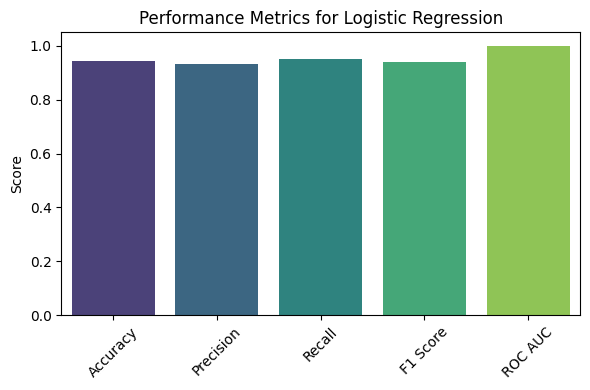

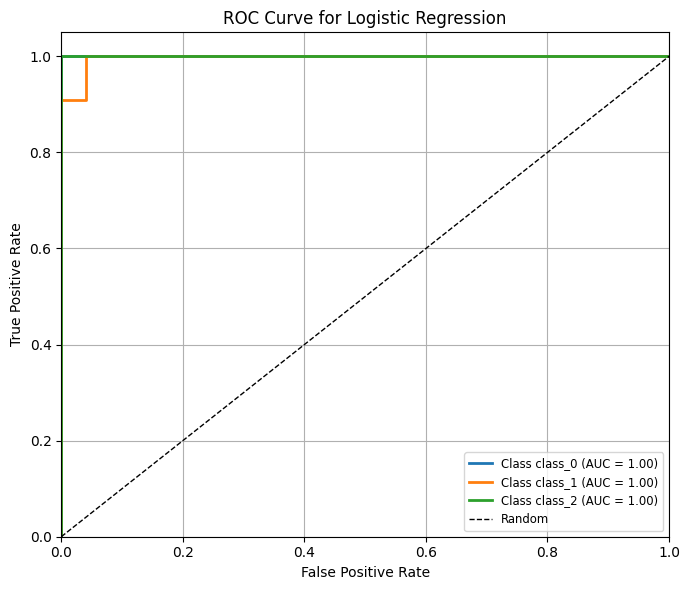


==== SVM ====


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/fc/kqr5vp3x1wg4z_8jvxpwqp1m0000gn/T/ipykernel_34113/1701331488.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


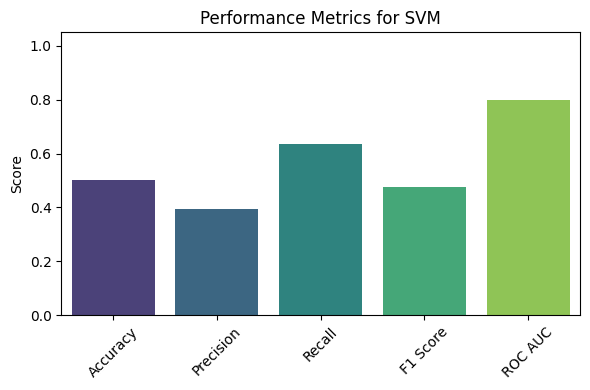

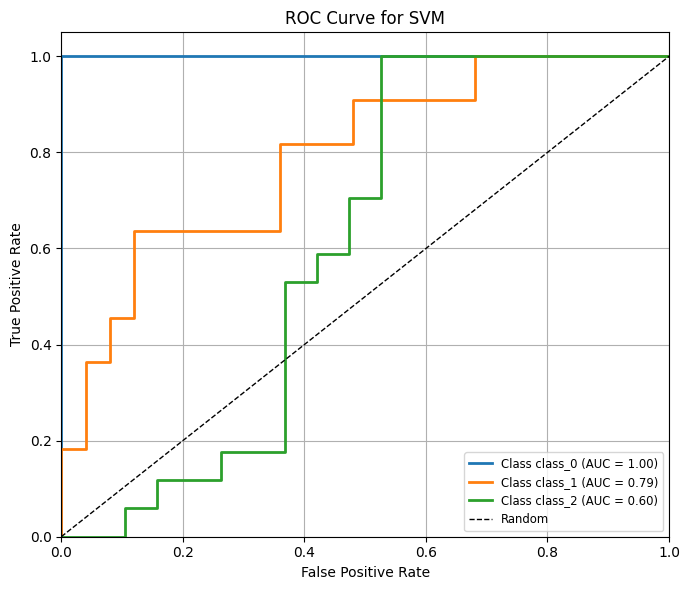


==== Random Forest ====


/var/folders/fc/kqr5vp3x1wg4z_8jvxpwqp1m0000gn/T/ipykernel_34113/1701331488.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


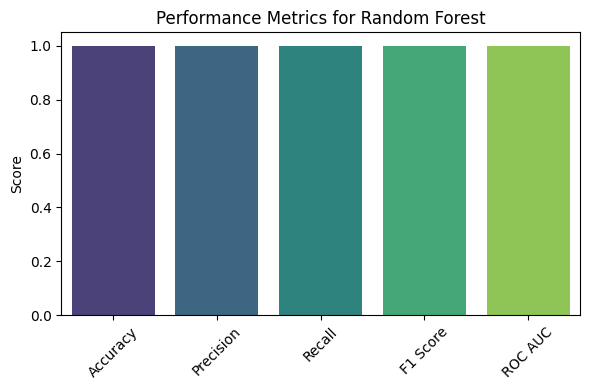

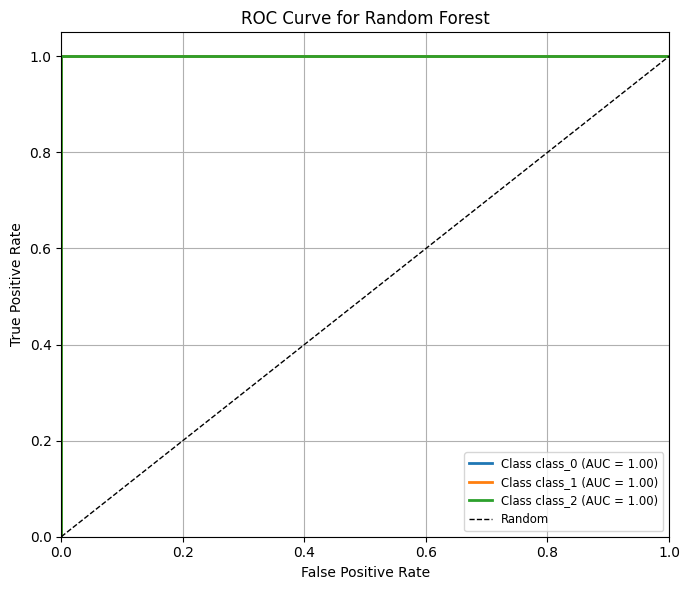

In [87]:
models = [log_reg, svm_classifier, rf_classifier]
names = ["Logistic Regression", "SVM", "Random Forest"]

for model, name in zip(models, names):
    print(f"\n==== {name} ====")
    evaluate_model_metrics(model, X_test, Y_test, name, wine.target_names)
    plot_model_roc_curve(model, X_test, Y_test, name, wine.target_names)
